In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
w = [0.18, 0.009, 0.18, 0.009, 0.18]

In [4]:
def generator_data(w ,):
   
    x1 = np.random.randint(1,25)
    x2 = np.random.randint(1,42)
    x3 = np.random.randint(1,12)
    x4 = np.random.randint(1,18)
    x5 = np.random.randint(1,23)
    y = w[0]*x1 + w[1]*x2 + w[2]*x3 + w[3]*x4 + w[4]*x5
    return [y, x1, x2, x3, x4, x5]

In [5]:
res = []
for i in range(1000):
    res.append(generator_data(w))

In [6]:
df = pd.DataFrame(res, columns= ['y', 'x1', 'x2', 'x3', 'x4', 'x5'])
df

,y,x1,x2,x3,x4,x5
0,3.906,7,17,8,17,5
1,8.352,20,16,8,12,17
2,5.706,14,39,4,15,11
3,4.221,9,35,1,14,11
4,5.022,10,28,4,10,12
...,...,...,...,...,...,...
995,7.767,24,31,5,12,12
996,5.274,5,12,10,14,13
997,8.964,17,13,10,3,22
998,3.915,6,39,8,16,5


In [7]:
df.describe()

,y,x1,x2,x3,x4,x5
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.676894,12.330000,21.113000,5.866000,9.173000,11.828000
std,1.782608,6.844702,12.020846,3.154996,5.021383,6.428354
min,1.323000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.398750,6.000000,11.000000,3.000000,5.000000,6.000000
50%,5.724000,12.000000,21.000000,6.000000,9.000000,12.000000
75%,6.934500,18.000000,32.000000,9.000000,14.000000,18.000000
max,10.629000,24.000000,41.000000,11.000000,17.000000,22.000000


In [8]:
df.y = df.y.round()

In [9]:
df

,y,x1,x2,x3,x4,x5
0,4.0,7,17,8,17,5
1,8.0,20,16,8,12,17
2,6.0,14,39,4,15,11
3,4.0,9,35,1,14,11
4,5.0,10,28,4,10,12
...,...,...,...,...,...,...
995,8.0,24,31,5,12,12
996,5.0,5,12,10,14,13
997,9.0,17,13,10,3,22
998,4.0,6,39,8,16,5


In [10]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse

In [11]:
y =df[["y"]]
x = df[["x1", "x2", "x3", "x4", "x5"]]
print(x.shape)
print(y.shape)

(1000, 5)
(1000, 1)


In [12]:
model=sm.OLS(y,x).fit()

In [13]:
model_summary=model.summary()

In [14]:
print(model_summary)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          8.508e+04
Date:                Sun, 12 Nov 2023   Prob (F-statistic):                        0.00
Time:                        17:36:46   Log-Likelihood:                         -171.14
No. Observations:                1000   AIC:                                      352.3
Df Residuals:                     995   BIC:                                      376.8
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 0)

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(x_train, y_train)

LinearRegression()

In [18]:
pred =lr.predict(x_test)

In [19]:
r2 = r2_score(y_test, pred)
print(r2)
mse = mean_squared_error(y_test, pred)
print(mse)
mae = mean_absolute_error(y_test, pred)
print(mae)

0.9749809558247492
0.08522487207857449
0.2547582817753776


<Axes: >

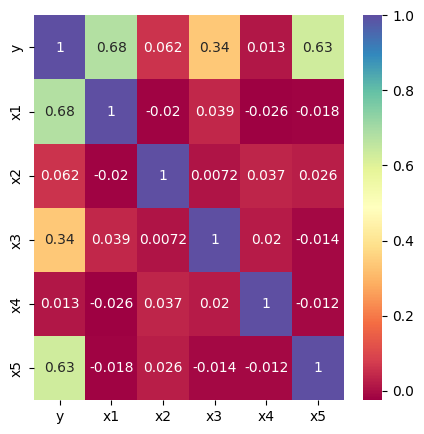

In [20]:
corr_matrix = df.corr()

#Матрица корреляции
plt.figure(figsize=(5,5))

sns.heatmap(corr_matrix,cmap='Spectral', annot = True)

In [21]:
result = {}
result['Linear_Regression'] = [mean_squared_error(y_test, pred), mean_absolute_error(y_test, pred), r2_score(y_test, pred)]
res_df = pd.DataFrame(result, index = ['MSE', 'MAE', 'R2'])

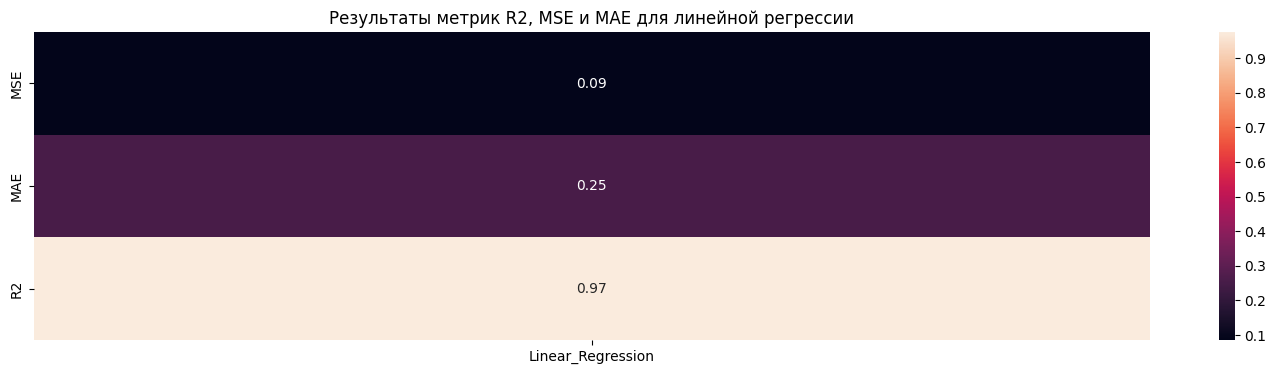

In [22]:
plt.figure(figsize=(18,4))
sns.heatmap(res_df, annot=True, fmt = '.2f')
plt.title('Результаты метрик R2, MSE и MAE для линейной регрессии')
plt.show()

In [23]:
all_predictions = pd.DataFrame(y_test)
all_predictions['LinearRegression'] =  pred

In [24]:
all_predictions

,y,LinearRegression
993,6.0,6.187885
859,5.0,5.484371
298,5.0,5.102788
553,4.0,4.445720
672,6.0,6.076430
...,...,...
462,7.0,7.496252
356,8.0,8.022693
2,6.0,5.709828
478,9.0,8.526556


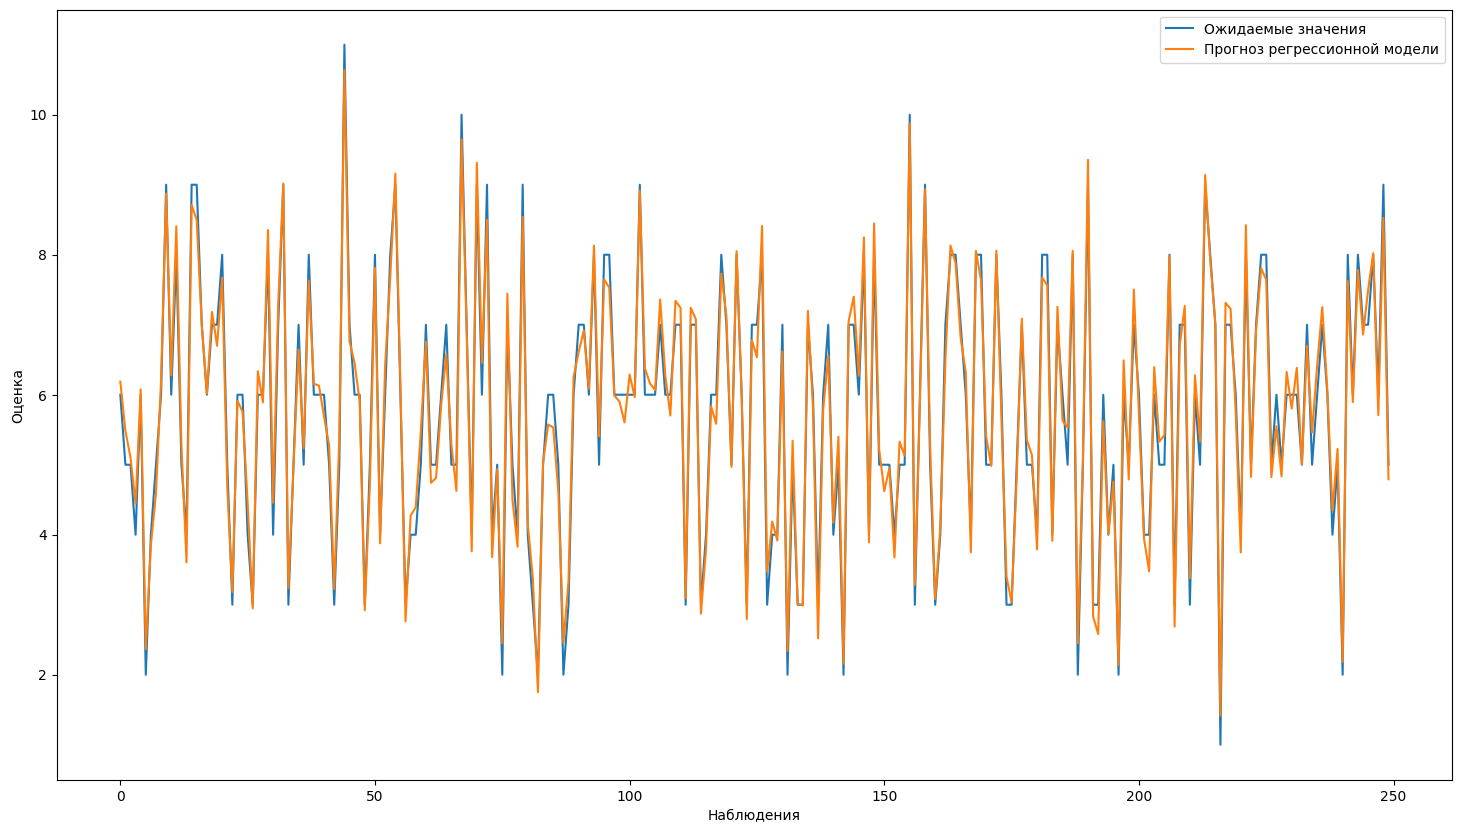

In [25]:
plt.figure(figsize=(18,10))
plt.plot(y_test.values, label = 'Ожидаемые значения')
plt.plot(all_predictions['LinearRegression'].values, label = 'Прогноз регрессионной модели')
plt.xlabel('Наблюдения')
plt.ylabel('Оценка')
plt.ticklabel_format(style='plain')
plt.legend()